In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/healthy-diet-recipes-a-comprehensive-dataset/All_Diets.csv
/kaggle/input/healthy-diet-recipes-a-comprehensive-dataset/mediterranean.csv
/kaggle/input/healthy-diet-recipes-a-comprehensive-dataset/paleo.csv
/kaggle/input/healthy-diet-recipes-a-comprehensive-dataset/vegan.csv
/kaggle/input/healthy-diet-recipes-a-comprehensive-dataset/keto.csv
/kaggle/input/healthy-diet-recipes-a-comprehensive-dataset/dash.csv


In [3]:
#importing for visualizations
import matplotlib.pyplot as plt

In [4]:
#I will use this dataset since it is the combination of all the others.
data = pd.read_csv('../input/healthy-diet-recipes-a-comprehensive-dataset/All_Diets.csv')

data.head()

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g),Extraction_day,Extraction_time
0,paleo,Bone Broth From 'Nom Nom Paleo',american,5.22,1.29,3.20,2022-10-16,17:20:09
1,paleo,"Paleo Effect Asian-Glazed Pork Sides, A Sweet ...",south east asian,181.55,28.62,146.14,2022-10-16,17:20:09
2,paleo,Paleo Pumpkin Pie,american,30.91,302.59,96.76,2022-10-16,17:20:09
3,paleo,Strawberry Guacamole recipes,mexican,9.62,75.78,59.89,2022-10-16,17:20:09
4,paleo,"Asian Cauliflower Fried ""Rice"" From 'Nom Nom P...",chinese,39.84,54.08,71.55,2022-10-16,17:20:09


In [5]:
# rows and columns

data.shape

(7806, 8)

In [6]:
#Data types seem to be in their preferred state

data.dtypes

Diet_type           object
Recipe_name         object
Cuisine_type        object
Protein(g)         float64
Carbs(g)           float64
Fat(g)             float64
Extraction_day      object
Extraction_time     object
dtype: object

In [7]:
#No null values to worry about

data.isna().sum()

Diet_type          0
Recipe_name        0
Cuisine_type       0
Protein(g)         0
Carbs(g)           0
Fat(g)             0
Extraction_day     0
Extraction_time    0
dtype: int64

In [53]:
#Looking at the summary statistics

data.describe()

,Protein(g),Carbs(g),Fat(g)
count,7806.000000,7806.000000,7806.000000
mean,83.231498,152.123189,117.328542
std,89.797282,185.907322,122.098117
min,0.000000,0.060000,0.000000
25%,24.415000,36.162500,41.067500
50%,56.280000,93.415000,84.865000
75%,112.357500,205.915000,158.290000
max,1273.610000,3405.550000,1930.240000


<AxesSubplot:>

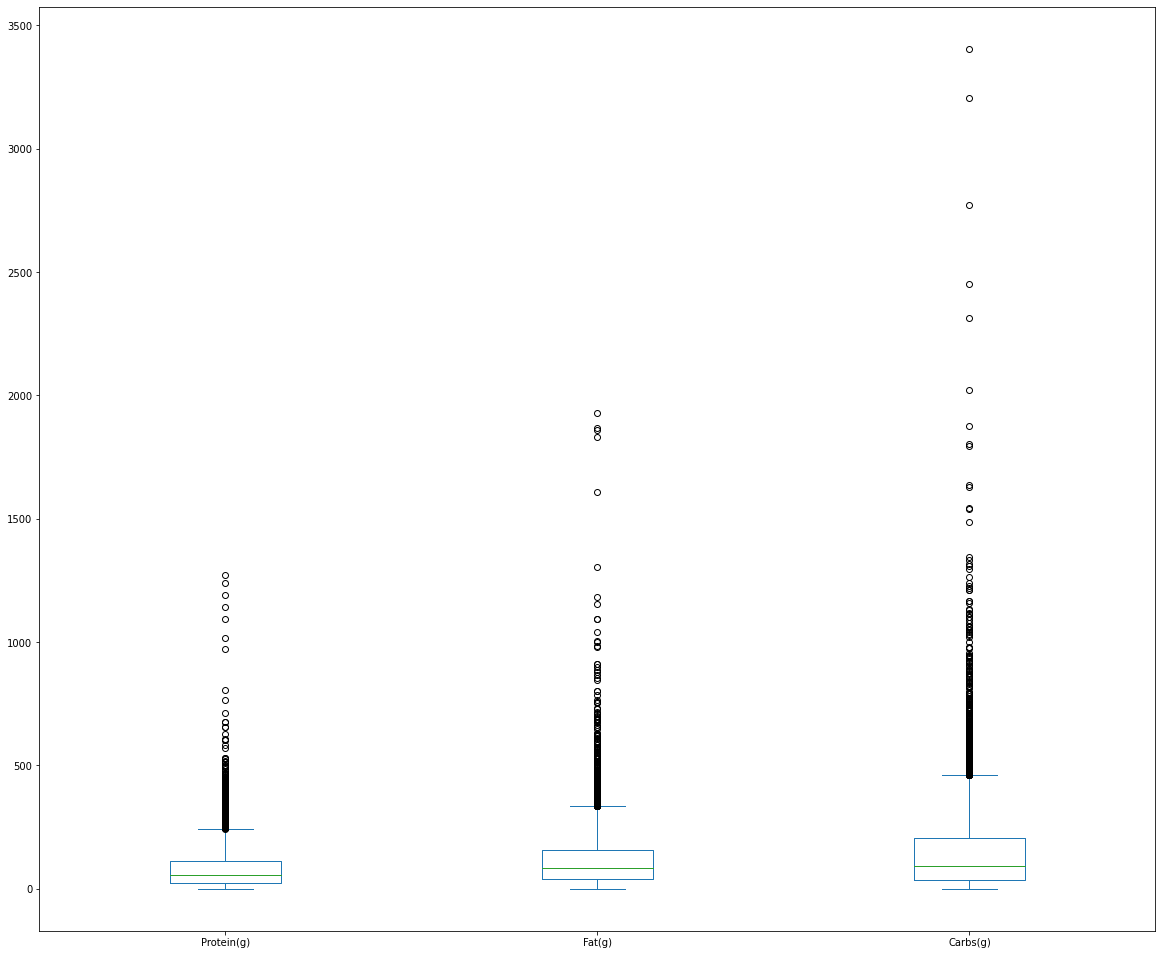

In [9]:
#The 75th percentile is showing that the max values are extremly out of range from the norm

#The Boxplot below seem to show that this is true. In order to remedy this and ensure we are getting the best information 
#from thsi data it may be best to remove outliers outside of the 75th percentile.

df = data.copy()

df[['Protein(g)', 'Fat(g)', 'Carbs(g)']].plot(kind='box', figsize=(20,17))

In [46]:
#Defining the interquartile ranges for protein, carbs and fat columns as well as their lower and upper bounds

#protein
p_q1 = np.quantile(df['Protein(g)'], .25) #1st quantile
p_q3 = np.quantile(df['Protein(g)'], .75) #3rd quantile

p_iqr = p_q3 - p_q1 #interquartile range

p_lower = p_q1 - 1.5 * p_iqr #lower bounds
p_upper = p_q3 + 1.5 * p_iqr #upper bounds

#repeat for the other 2 columns below

#carbs
c_q1 = np.quantile(df['Carbs(g)'], .25)
c_q3 = np.quantile(df['Carbs(g)'], .75)

c_iqr = c_q3 - c_q1

c_lower = c_q1 - 1.5 * c_iqr
c_upper = c_q3 + 1.5 * c_iqr


#fat
f_q1 = np.quantile(df['Fat(g)'], .25)
f_q3 = np.quantile(df['Fat(g)'], .75)

f_iqr = f_q3 - f_q1

f_lower = f_q1 - 1.5 * f_iqr
f_upper = f_q3 + 1.5 * f_iqr


In [47]:
#replacing outliers with upper and lower bounds values

#upper bounds
df['Protein(g)'] = np.where(df['Protein(g)'] > p_upper, p_upper,df['Protein(g)'] )

df['Carbs(g)'] = np.where(df['Carbs(g)'] > c_upper, c_upper,df['Carbs(g)'] )

df['Fat(g)'] = np.where(df['Fat(g)'] > f_upper, f_upper,df['Fat(g)'] )


#lower bounds

df['Protein(g)'] = np.where(df['Protein(g)'] < p_lower, p_lower,df['Protein(g)'] )

df['Carbs(g)'] = np.where(df['Carbs(g)'] < c_lower, c_lower,df['Carbs(g)'] )

df['Fat(g)'] = np.where(df['Fat(g)'] < f_lower, f_lower,df['Fat(g)'] )



Text(0.5, 0, 'Protein, Carbs, Fat')

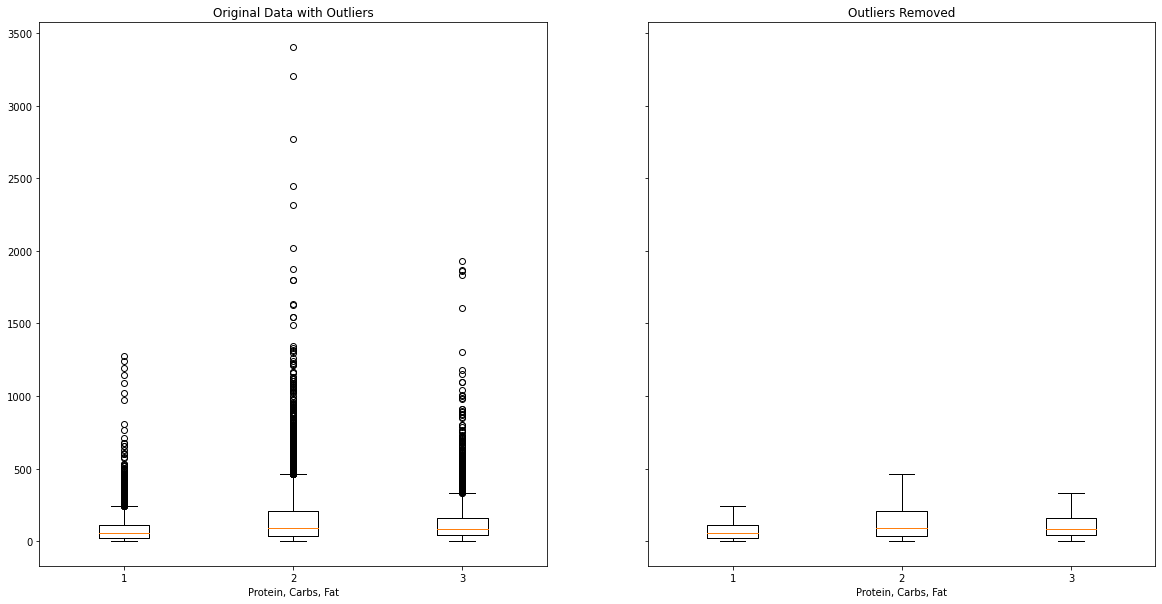

In [52]:
#visualizing data with boxplots again

fig, (ax1,ax2) = plt.subplots(1, 2, sharey=True, figsize=(20, 10))

ax1.boxplot(data[['Protein(g)', 'Carbs(g)', 'Fat(g)']])
ax1.set_title('Original Data with Outliers')
ax1.set_xlabel('Protein, Carbs, Fat')


ax2.boxplot(df[['Protein(g)', 'Carbs(g)', 'Fat(g)']])
ax2.set_title('Outliers Removed')
ax2.set_xlabel('Protein, Carbs, Fat')


In [45]:
# We can see that performing the transformations above will doe snot chnage them mean values of the effected columns nor the range. A benefit of using the IQR.

df.shape

(7806, 11)

## We can see now that df has removed all traceable outliers. This should help us with getting more accurate analysis. Moving forward all data will be analyzed through the df data.

# 1. How many calories in each recipe? Which diet type has the lowest average calories per recipe?

In [13]:
#Would be helpful here to create a calories column. 1g Protein = 4 cals, 1g of carbs = 4 cals, 1g of fat = 9 cals

df['Cals'] = np.multiply(df['Protein(g)'], 4) + np.multiply(df['Carbs(g)'], 4) +  np.multiply(df['Fat(g)'], 9)

df.head()

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g),Extraction_day,Extraction_time,Cals
0,paleo,Bone Broth From 'Nom Nom Paleo',american,5.22,1.29,3.20,2022-10-16,17:20:09,54.84
1,paleo,"Paleo Effect Asian-Glazed Pork Sides, A Sweet ...",south east asian,181.55,28.62,146.14,2022-10-16,17:20:09,2155.94
2,paleo,Paleo Pumpkin Pie,american,30.91,302.59,96.76,2022-10-16,17:20:09,2204.84
3,paleo,Strawberry Guacamole recipes,mexican,9.62,75.78,59.89,2022-10-16,17:20:09,880.61
4,paleo,"Asian Cauliflower Fried ""Rice"" From 'Nom Nom P...",chinese,39.84,54.08,71.55,2022-10-16,17:20:09,1019.63


Text(0, 0.5, 'Calories')

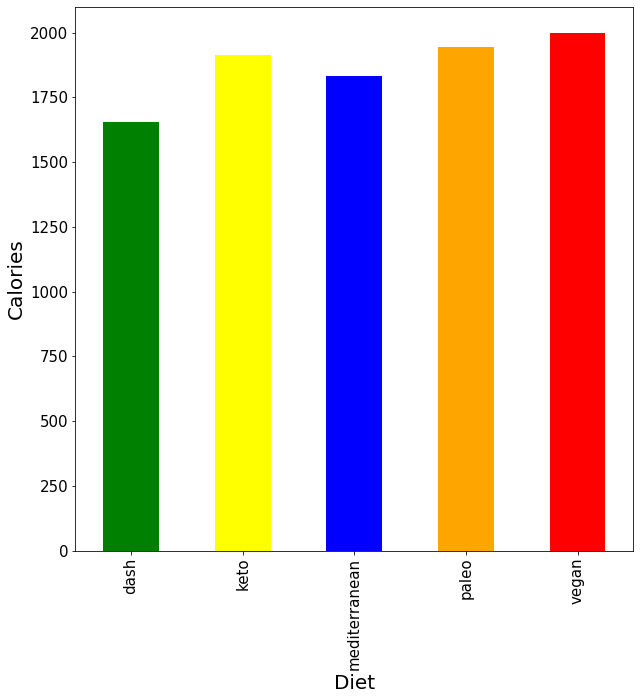

In [14]:
# Let's plot the avg amount of calories per Diet type recipe)

colors = ['green', 'yellow', 'blue', 'orange', 'red']

df.groupby('Diet_type')['Cals'].mean().plot(kind='bar', figsize=(10,10), fontsize= 15, color=colors)

plt.xlabel('Diet', fontsize=20)
plt.ylabel('Calories', fontsize=20)










## The DASH diet is the lowest in calories per meal on average. It is rich in fruits, vegetables, whole grains, and low-fat dairy foods. It includes meat, fish, poultry, nuts, and beans, and is **limited in sugar-sweetened foods and beverages, red meat, and added fats**.

# 2. Which cuisine type is the highest in calories?

In [15]:
df.groupby('Cuisine_type')['Cals'].mean().sort_values(ascending=False)

Cuisine_type
central europe      2206.646360
italian             2087.140943
american            2061.447094
british             1947.178938
south east asian    1944.333657
kosher              1938.387143
french              1921.786184
mexican             1849.024654
eastern europe      1808.031182
indian              1804.657908
nordic              1804.425880
asian               1756.183204
middle eastern      1744.577775
mediterranean       1698.628119
south american      1635.455785
japanese            1603.962850
chinese             1513.667365
caribbean           1458.596319
world                150.624208
Name: Cals, dtype: float64

In [16]:
#something is wrong here. There are Asian , South east Asian Chinese, indian and japanese categories.
#This could get confusing. We are better off creating a new version of this column where values are combined.

#Since Indian, Jaoanese and Chinese are well known and more easily distinguised I will only combine values that are Asian and South East Asian as 'Other Asian'

# data['Cuisine_new'] = np.where(data['Cuisine_type'] == 'indian', 'asian',data['Cuisine_type'] )

df['Cuisine_new'] = data['Cuisine_type'].replace(['south east asian', 'asian'], 'other asian')

df.groupby('Cuisine_new')['Cals'].mean().sort_values(ascending=False)

Cuisine_new
central europe    2206.646360
italian           2087.140943
american          2061.447094
british           1947.178938
kosher            1938.387143
french            1921.786184
other asian       1857.811916
mexican           1849.024654
eastern europe    1808.031182
indian            1804.657908
nordic            1804.425880
middle eastern    1744.577775
mediterranean     1698.628119
south american    1635.455785
japanese          1603.962850
chinese           1513.667365
caribbean         1458.596319
world              150.624208
Name: Cals, dtype: float64

In [17]:
#Top 5. uisines based on highest number of average calories


top5 = df.groupby('Cuisine_type')['Cals'].mean().sort_values(ascending=False)[:4].index

top5

Index(['central europe', 'italian', 'american', 'british'], dtype='object', name='Cuisine_type')

In [18]:
boolnames = df['Cuisine_type'].isin(top5)

In [19]:
df['Top or Other'] = np.where(~boolnames == True, 'Other', df['Cuisine_type'])

df['Top or Other'].value_counts()

Other             3827
american          2907
italian            799
british            239
central europe      34
Name: Top or Other, dtype: int64

Text(0.5, 1.0, 'Highest Calories on Average')

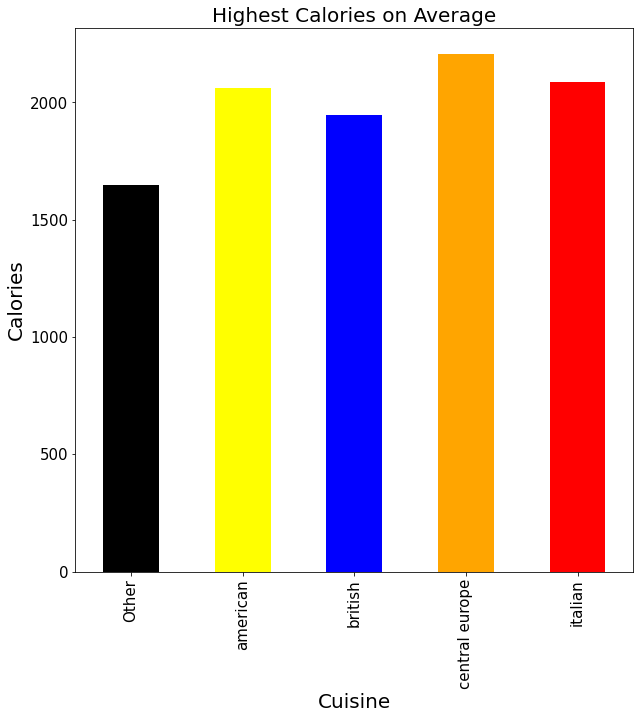

In [20]:

colors = ['black', 'yellow', 'blue', 'orange', 'red']

df.groupby('Top or Other')['Cals'].mean().plot(kind='bar', figsize=(10,10), color =colors, fontsize=15 )

plt.xlabel('Cuisine', fontsize=20)
plt.ylabel('Calories', fontsize=20)

plt.title('Highest Calories on Average', fontsize=20)

## American and Italian dishes are the highest in calories

# 3. Lowest Calories?

In [21]:
low5 = df.groupby('Cuisine_type')['Cals'].mean().sort_values()[1:6]

low5

Cuisine_type
caribbean         1458.596319
chinese           1513.667365
japanese          1603.962850
south american    1635.455785
mediterranean     1698.628119
Name: Cals, dtype: float64

## Chinese and Japanese recipes are the lowest in calories

# 4. Lowest Fat?

In [22]:
df.groupby('Cuisine_new')['Fat(g)'].mean().sort_values()[1:6]

Cuisine_new
chinese           83.770906
south american    87.008595
japanese          89.888350
mediterranean     93.727635
caribbean         95.820208
Name: Fat(g), dtype: float64

# The Chinese recipes seem to be the lowest in fat in this dataset

# 5. Highest Protein?

Text(0.5, 1.0, 'Average Protein per Recipe type')

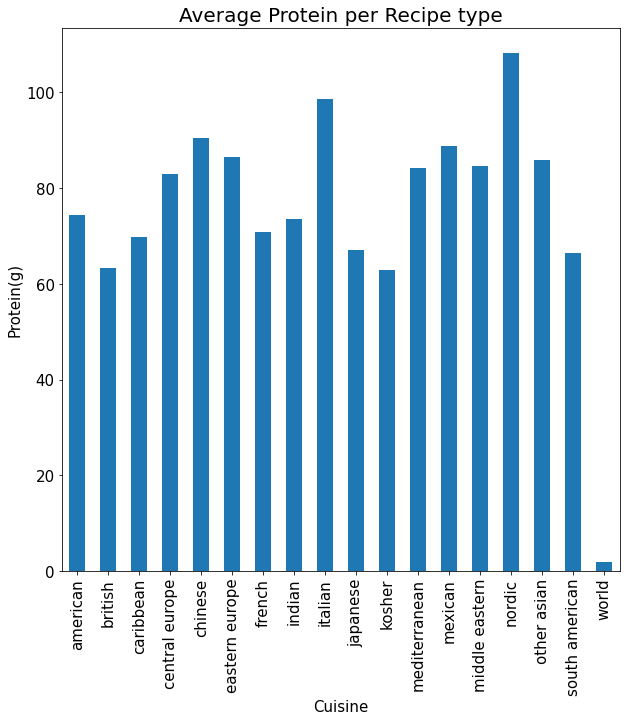

In [23]:
df.groupby('Cuisine_new')['Protein(g)'].mean().plot(kind='bar', figsize=(10,10), fontsize= 15)
plt.xlabel('Cuisine', fontsize=15)
plt.ylabel('Protein(g)', fontsize=15)

plt.title('Average Protein per Recipe type', fontsize=20)

Text(0.5, 1.0, 'Average Protein per Diet type')

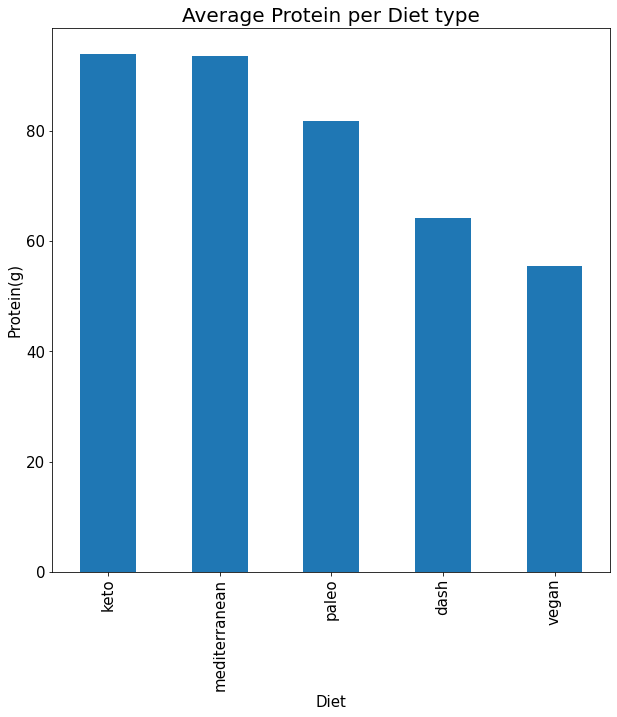

In [24]:
df.groupby('Diet_type')['Protein(g)'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10,10), fontsize= 15)
plt.xlabel('Diet', fontsize=15)
plt.ylabel('Protein(g)', fontsize=15)

plt.title('Average Protein per Diet type', fontsize=20)

## Nordic and Italian recipes are the highest in Protein on average while Keto is the diet with the most protein.

# 6. Is there a correlation between the macro nutirents?


In [25]:
df.columns

Index(['Diet_type', 'Recipe_name', 'Cuisine_type', 'Protein(g)', 'Carbs(g)',
       'Fat(g)', 'Extraction_day', 'Extraction_time', 'Cals', 'Cuisine_new',
       'Top or Other'],
      dtype='object')

In [26]:
df.corr()

,Protein(g),Carbs(g),Fat(g),Cals
Protein(g),1.000000,0.164740,0.528812,0.643185
Carbs(g),0.164740,1.000000,0.259905,0.632024
Fat(g),0.528812,0.259905,1.000000,0.889820
Cals,0.643185,0.632024,0.889820,1.000000


Text(0.5, 1.0, 'Carbs and Calories')

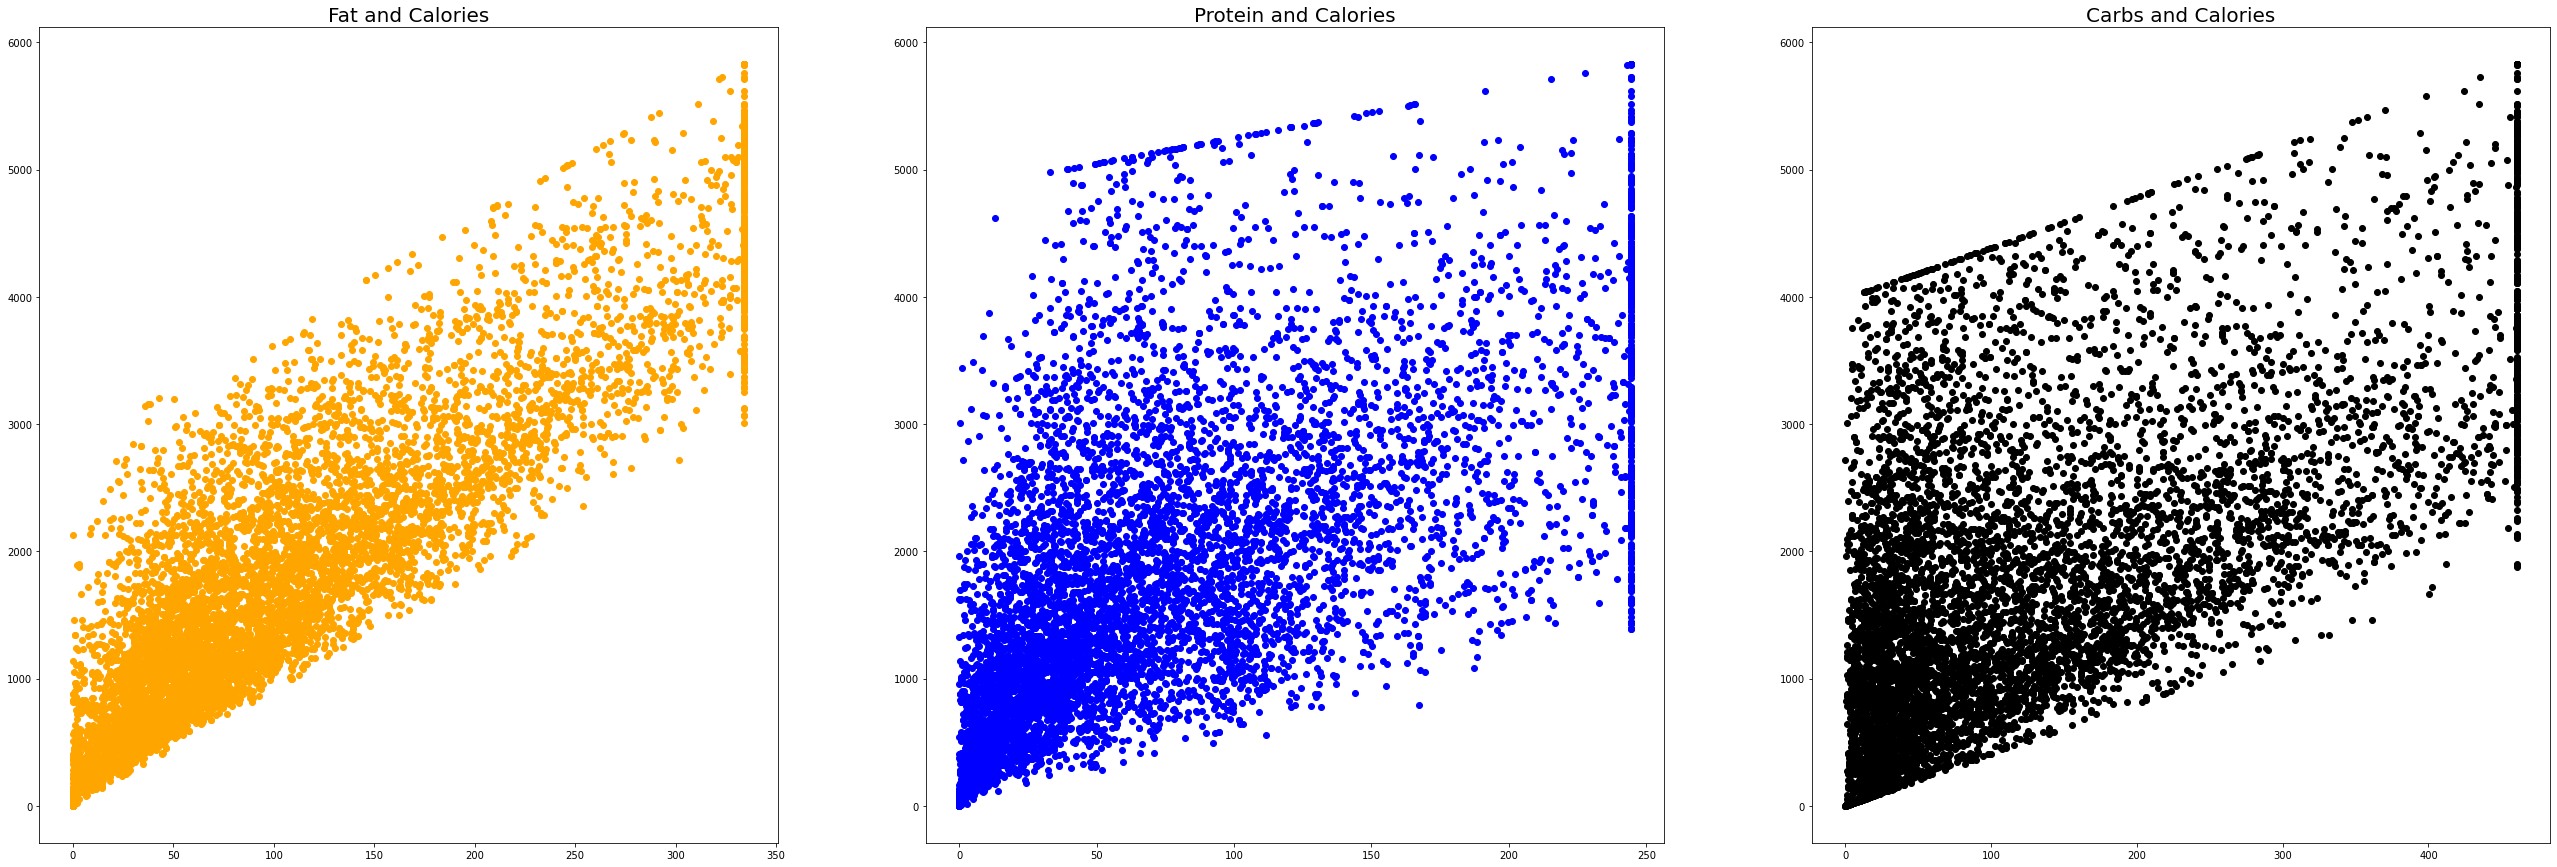

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(45, 15))


ax1.scatter(df['Fat(g)'], df.Cals, color='orange')
ax1.set_title('Fat and Calories', fontsize=20)


ax2.scatter(df['Protein(g)'], df.Cals, color='blue')
ax2.set_title('Protein and Calories', fontsize=20)


ax3.scatter(df['Carbs(g)'], df.Cals, color='black')
ax3.set_title('Carbs and Calories', fontsize=20)


## While all macronutrients are positviely correlated, it is fat that seems to be most correlated in recipes with higher calories

# 7. What Diet Types and Cuisines type are highest in Fat?

Text(0, 0.5, 'Fat(g)')

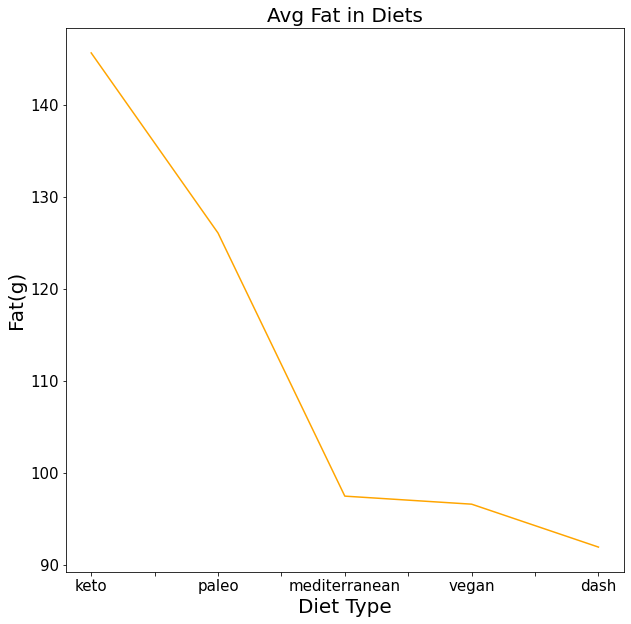

In [28]:
# Diet type by Fat

df.groupby('Diet_type')['Fat(g)'].mean().sort_values(ascending=False).plot(figsize=(10,10), fontsize=15, color = 'orange')
plt.title('Avg Fat in Diets', fontsize=20)
plt.xlabel('Diet Type', fontsize=20)
plt.ylabel('Fat(g)', fontsize=20)



## Keto which focuses on avoiding carbs is the highest in fats. We know from the previous visual on protein that Keto is also highest in Protein. 

Text(0, 0.5, 'Fat(g)')

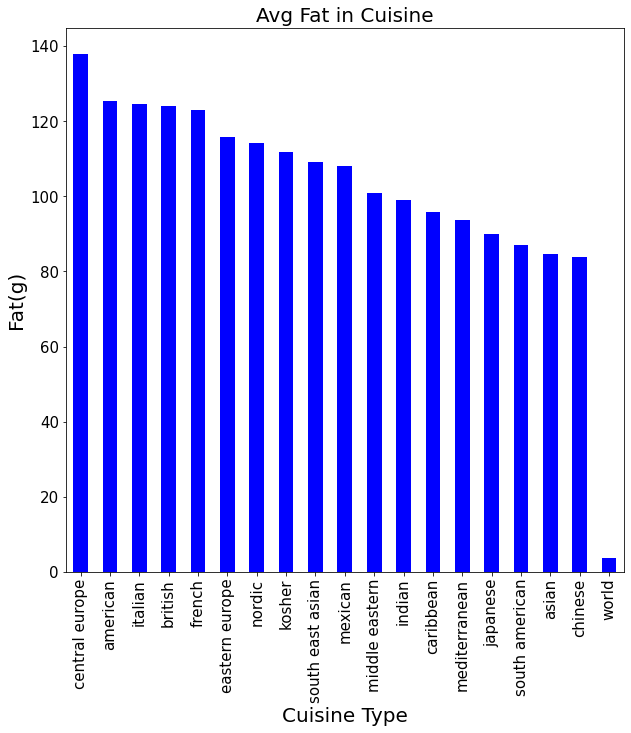

In [43]:
df.groupby('Cuisine_type')['Fat(g)'].mean().sort_values(ascending=False).plot(kind='bar',figsize=(10,10), fontsize=15, color = 'blue')
plt.title('Avg Fat in Cuisine', fontsize=20)
plt.xlabel('Cuisine Type', fontsize=20)
plt.ylabel('Fat(g)', fontsize=20)

## Central Europe seems to have the highest fat

# 10.  Build a Clasification model. Can we predict the diet type using the other features?

In [30]:
df.columns

Index(['Diet_type', 'Recipe_name', 'Cuisine_type', 'Protein(g)', 'Carbs(g)',
       'Fat(g)', 'Extraction_day', 'Extraction_time', 'Cals', 'Cuisine_new',
       'Top or Other'],
      dtype='object')

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = df[['Protein(g)', 'Carbs(g)','Fat(g)', 'Cals']]

y = df['Diet_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



for i in range(1,25):
    neigh = KNeighborsClassifier(n_neighbors=i)

    neigh.fit(X_train, y_train)

    y_pred = neigh.predict(X_test)

y_pred





array(['vegan', 'dash', 'dash', ..., 'keto', 'vegan', 'keto'],
      dtype=object)

In [42]:
print('Classification Report\n\n',classification_report(y_test.values.reshape(-1,1), y_pred))

Classification Report

                precision    recall  f1-score   support

         dash       0.43      0.34      0.38       558
         keto       0.46      0.74      0.57       487
mediterranean       0.37      0.33      0.35       593
        paleo       0.26      0.11      0.16       436
        vegan       0.44      0.55      0.49       502

     accuracy                           0.42      2576
    macro avg       0.39      0.41      0.39      2576
 weighted avg       0.39      0.42      0.39      2576



## The acuracy is low at 35%